In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Distribution of PAL in Wave 1

## PAL per child

In [16]:
fitbit_new = pd.read_csv('../data/Fitbit_Imputation_FINAL.csv', sep=';', header=0)
steps_mean_wave_new = fitbit_new.groupby(['Child', 'Wave']).mean()['Steps'].reset_index()
steps_mean_wave_new.Steps = steps_mean_wave_new.Steps * 0.000153
steps_mean_wave_new = steps_mean_wave_new.pivot(index='Child', columns='Wave')['Steps']

In [17]:
steps_mean_wave_new.describe()

Wave,1,2,3,4,5,6,7
count,926.000000,928.000000,927.000000,929.000000,1028.000000,782.000000,782.000000
mean,1.402477,1.534053,1.590081,1.436387,1.337196,1.610850,1.444116
std,0.525666,0.584990,0.600745,0.566656,0.529620,0.652722,0.602641
min,0.188904,0.153000,0.153000,0.153000,0.153000,0.200481,0.153000
25%,1.029907,1.119218,1.194089,1.030429,0.973689,1.167224,1.036403
50%,1.358293,1.498252,1.512762,1.395054,1.286317,1.544003,1.405549
75%,1.691782,1.915246,1.928030,1.783266,1.685230,1.999175,1.808830
max,3.436686,4.013129,4.065149,3.432912,3.606312,3.947655,4.026578


In [12]:
steps_wave1 = steps_mean_wave_new[1]
PAL_wave1 = steps_wave1.dropna()
PAL_wave1

Child
902     1.614558
904     1.414852
907     0.598307
908     1.782195
909     1.534988
          ...   
4886    1.681215
4887    2.513535
4888    1.642353
4889    2.356557
4890    1.612722
Name: 1, Length: 926, dtype: float64

## Frequency distribution

(array([ 4.,  2.,  2.,  5.,  9., 15., 14., 15., 17., 25., 34., 40., 54.,
        53., 38., 47., 38., 51., 64., 38., 40., 40., 44., 21., 26., 28.,
        27., 19., 20., 14., 20.,  5., 10.,  5.,  6.,  8.,  4.,  3.,  5.,
         1.,  2.,  2.,  2.,  1.,  3.,  0.,  2.,  1.,  0.,  2.]),
 array([0.188904  , 0.25385964, 0.31881528, 0.38377092, 0.44872656,
        0.5136822 , 0.57863784, 0.64359348, 0.70854912, 0.77350476,
        0.8384604 , 0.90341604, 0.96837168, 1.03332732, 1.09828296,
        1.1632386 , 1.22819424, 1.29314988, 1.35810552, 1.42306116,
        1.4880168 , 1.55297244, 1.61792808, 1.68288372, 1.74783936,
        1.812795  , 1.87775064, 1.94270628, 2.00766192, 2.07261756,
        2.1375732 , 2.20252884, 2.26748448, 2.33244012, 2.39739576,
        2.4623514 , 2.52730704, 2.59226268, 2.65721832, 2.72217396,
        2.7871296 , 2.85208524, 2.91704088, 2.98199652, 3.04695216,
        3.1119078 , 3.17686344, 3.24181908, 3.30677472, 3.37173036,
        3.436686  ]),
 <BarContainer

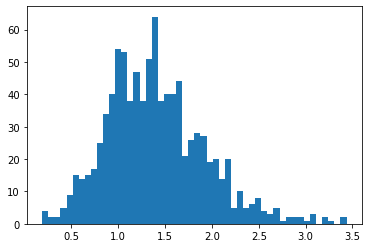

In [13]:
plt.hist(PAL_wave1, bins=50)

## Cumulative distribution

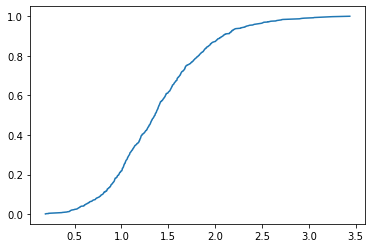

In [14]:
ecdf = ECDF(PAL_wave1)

plt.plot(ecdf.x, ecdf.y)

## Save plots

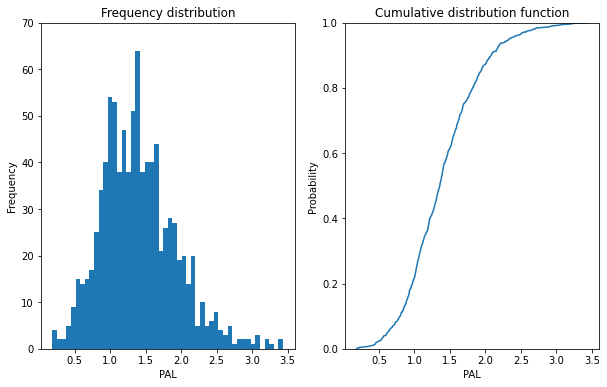

In [25]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

ax1.set_title('Frequency distribution')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('PAL')
ax1.set_ylim([0, 70])
ax1.hist(PAL_wave1, bins=50)

ax2.set_title('Cumulative distribution function')
ax2.set_ylabel('Probability')
ax2.set_xlabel('PAL')
ax2.set_ylim([0, 1])
ax2.plot(ecdf.x, ecdf.y)


fig.savefig('../output/pal_w1_dist.eps', bbox_inches='tight', format='eps', dpi=1000)

